# Libraries Required

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm
import datetime

# Import Dataset

In [2]:
dataframe_Jan22 = pd.read_csv('JC-202201-citibike-tripdata.csv')
dataframe_Feb22 = pd.read_csv('JC-202202-citibike-tripdata.csv')
dataframe_Mar22 = pd.read_csv('JC-202203-citibike-tripdata.csv')
dataframe_Apr22 = pd.read_csv('JC-202204-citibike-tripdata.csv')
dataframe_May22 = pd.read_csv('JC-202205-citibike-tripdata.csv')
dataframe_Jun22 = pd.read_csv('JC-202206-citibike-tripdata.csv')
dataframe_Jul22 = pd.read_csv('JC-202207-citbike-tripdata.csv')
dataframe_Aug22 = pd.read_csv('JC-202208-citibike-tripdata.csv')
dataframe_Sep22 = pd.read_csv('JC-202209-citibike-tripdata.csv')
dataframe_Oct22 = pd.read_csv('JC-202210-citibike-tripdata.csv')
dataframe_Nov22 = pd.read_csv('JC-202211-citibike-tripdata.csv')
dataframe_Dec22 = pd.read_csv('JC-202212-citibike-tripdata.csv')

In [3]:
dataframe_Jan22.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member


# Data Cleansing

In [4]:
#Union all 2022 data
dataframe_2022 = pd.concat([dataframe_Jan22, dataframe_Feb22, dataframe_Mar22, dataframe_Apr22, dataframe_May22, dataframe_Jun22, dataframe_Jul22, dataframe_Aug22, dataframe_Sep22, dataframe_Oct22, dataframe_Nov22, dataframe_Dec22], ignore_index=True)
print(dataframe_2022.columns)
print(dataframe_2022.head())
print(dataframe_2022.dtypes)

Index(['ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')
            ride_id  rideable_type           started_at             ended_at  \
0  CA5837152804D4B5  electric_bike  2022-01-26 18:50:39  2022-01-26 18:51:53   
1  BA06A5E45B6601D2   classic_bike  2022-01-28 13:14:07  2022-01-28 13:20:23   
2  7B6827D7B9508D93   classic_bike  2022-01-10 19:55:13  2022-01-10 20:00:37   
3  6E5864EA6FCEC90D  electric_bike  2022-01-26 07:54:57  2022-01-26 07:55:22   
4  E24954255BBDE32D  electric_bike  2022-01-13 18:44:46  2022-01-13 18:45:43   

     start_station_name start_station_id      end_station_name end_station_id  \
0  12 St & Sinatra Dr N            HB201  12 St & Sinatra Dr N          HB201   
1      Essex Light Rail            JC038      Essex Light Rail          JC038   
2      Essex Light Rail   

In [5]:
#Convert started_at and ended_at to datetimes
dataframe_2022['started_at']= pd.to_datetime(dataframe_2022['started_at'])
dataframe_2022['ended_at']= pd.to_datetime(dataframe_2022['ended_at'])

In [6]:
print(dataframe_2022.dtypes)
dataframe_2022.head()

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member


In [7]:
#Add Month, hour, and day of the week columns
dataframe_2022['month'] = pd.DatetimeIndex(dataframe_2022['started_at']).month
dataframe_2022['hour'] = pd.DatetimeIndex(dataframe_2022['started_at']).hour
dataframe_2022['day_of_week'] = pd.DatetimeIndex(dataframe_2022['started_at']).weekday
dataframe_2022['day_name']= dataframe_2022['started_at'].dt.day_name()

                            
dataframe_2022.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,hour,day_of_week,day_name
0,CA5837152804D4B5,electric_bike,2022-01-26 18:50:39,2022-01-26 18:51:53,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,1,18,2,Wednesday
1,BA06A5E45B6601D2,classic_bike,2022-01-28 13:14:07,2022-01-28 13:20:23,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,1,13,4,Friday
2,7B6827D7B9508D93,classic_bike,2022-01-10 19:55:13,2022-01-10 20:00:37,Essex Light Rail,JC038,Essex Light Rail,JC038,40.712774,-74.036486,40.712774,-74.036486,member,1,19,0,Monday
3,6E5864EA6FCEC90D,electric_bike,2022-01-26 07:54:57,2022-01-26 07:55:22,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,1,7,2,Wednesday
4,E24954255BBDE32D,electric_bike,2022-01-13 18:44:46,2022-01-13 18:45:43,12 St & Sinatra Dr N,HB201,12 St & Sinatra Dr N,HB201,40.750604,-74.024020,40.750604,-74.024020,member,1,18,3,Thursday


# Ride Info

In [8]:
dataframe_2022['duration']= dataframe_2022['ended_at'] - dataframe_2022['started_at']
print(dataframe_2022.duration.dtype)

timedelta64[ns]


In [9]:
dataframe_2022['duration'].mean()

Timedelta('0 days 00:17:32.520605035')

In [10]:
dataframe_2022['duration'].median()

Timedelta('0 days 00:07:12')

In [11]:
dataframe_2022.to_csv('citi_bike_2022.csv')

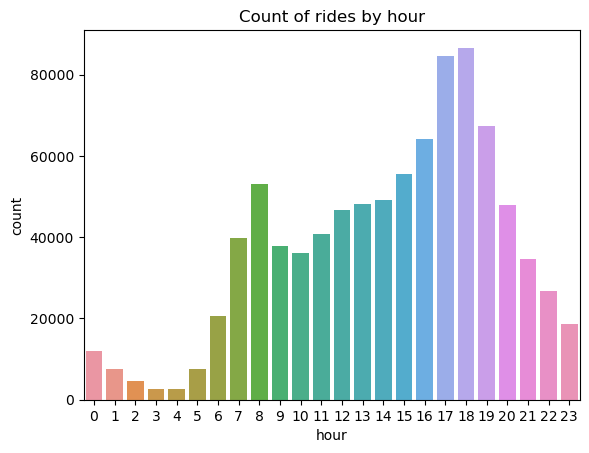

In [11]:
sns.countplot(data = dataframe_2022, x = 'hour').set(title='Count of rides by hour')
plt.show()

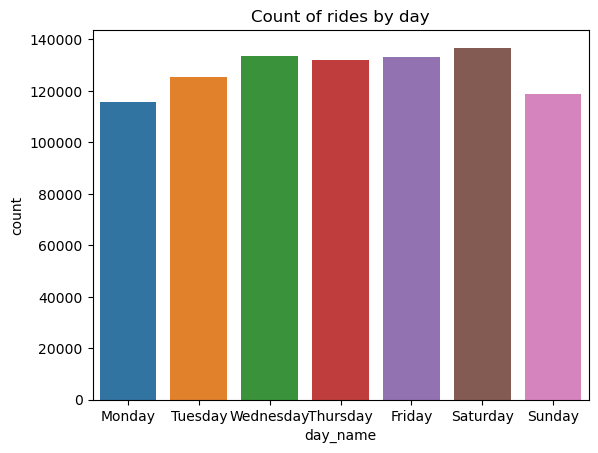

In [12]:
category_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data= dataframe_2022, x = 'day_name', order = category_order).set(title='Count of rides by day')
plt.show()

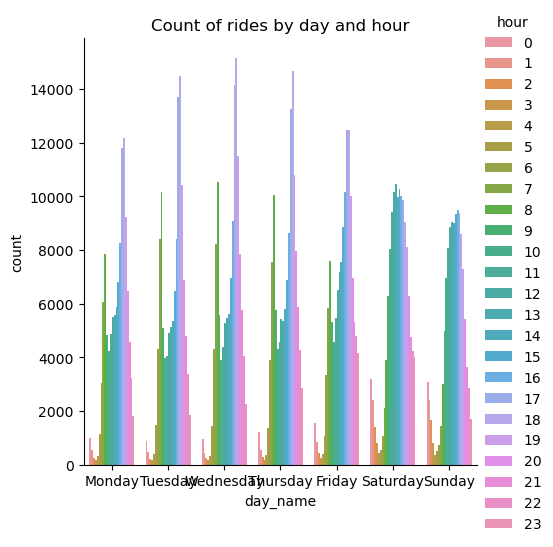

In [13]:
sns.catplot(data= dataframe_2022, x = 'day_name', kind= 'count', hue ='hour', order = category_order).set(title='Count of rides by day and hour')
plt.show()

# Popular Starting Stations

In [14]:
start_station_count = dataframe_2022.start_station_name.value_counts()
start_station_count_members = dataframe_2022[dataframe_2022['member_casual']=='member'].start_station_name.value_counts()
start_station_count_casual = dataframe_2022[dataframe_2022['member_casual']=='casual'].start_station_name.value_counts()
print(start_station_count, start_station_count_members, start_station_count_casual)


Grove St PATH                                   42556
South Waterfront Walkway - Sinatra Dr & 1 St    34245
Hoboken Terminal - River St & Hudson Pl         33020
Hoboken Terminal - Hudson St & Hudson Pl        30244
City Hall - Washington St & 1 St                23289
                                                ...  
Bergen Ave & Stegman St                          1235
Grant Ave & MLK Dr                                615
York St & Marin Blvd                              556
JCBS Depot                                          2
MTL-ECO5-LAB                                        2
Name: start_station_name, Length: 84, dtype: int64 Grove St PATH                                   34633
Hoboken Terminal - River St & Hudson Pl         20210
Hoboken Terminal - Hudson St & Hudson Pl        18044
South Waterfront Walkway - Sinatra Dr & 1 St    17616
Hamilton Park                                   15016
                                                ...  
Jackson Square                 

# Popular Ending Stations

In [15]:
end_station_count = dataframe_2022.end_station_name.value_counts()
end_station_count_members = dataframe_2022[dataframe_2022['member_casual']=='member'].end_station_name.value_counts()
end_station_count_casual = dataframe_2022[dataframe_2022['member_casual']=='casual'].end_station_name.value_counts()
print(end_station_count, end_station_count_members, end_station_count_casual)

Grove St PATH                                   44730
South Waterfront Walkway - Sinatra Dr & 1 St    34750
Hoboken Terminal - River St & Hudson Pl         32417
Hoboken Terminal - Hudson St & Hudson Pl        30220
City Hall - Washington St & 1 St                23591
                                                ...  
W 51 St & 6 Ave                                     1
Broadway & E 21 St                                  1
Plaza Dr & W 170 St                                 1
E 118 St & 1 Ave                                    1
E 22 St & 2 Ave                                     1
Name: end_station_name, Length: 320, dtype: int64 Grove St PATH                                   36734
Hoboken Terminal - River St & Hudson Pl         22104
Hoboken Terminal - Hudson St & Hudson Pl        18334
South Waterfront Walkway - Sinatra Dr & 1 St    17057
Newport Pkwy                                    15146
                                                ...  
E 59 St & Madison Ave           

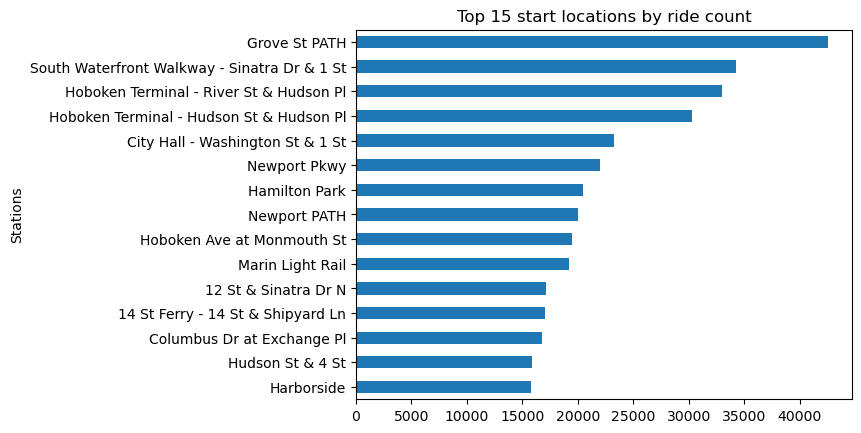

In [16]:
start_station_count.sort_values().tail(15).plot(kind='barh', title='Top 15 start locations by ride count', xlabel='Stations', ylabel='Ride count')
plt.show()

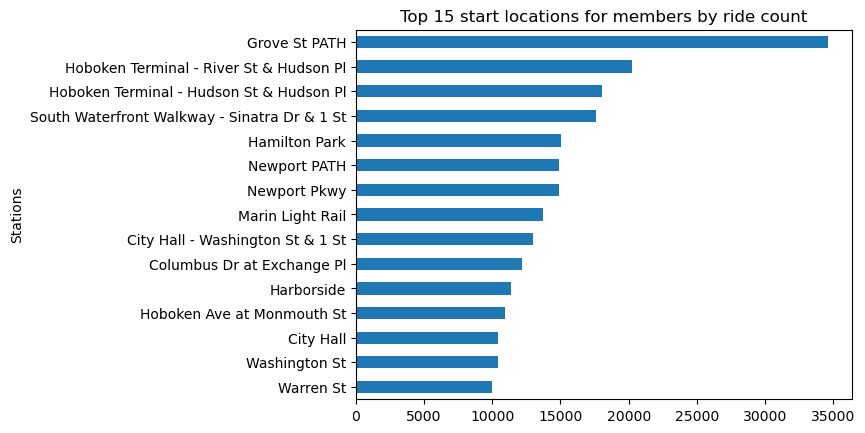

In [17]:
start_station_count_members.sort_values().tail(15).plot(kind='barh', title='Top 15 start locations for members by ride count', xlabel='Stations', ylabel='Ride count')
plt.show()

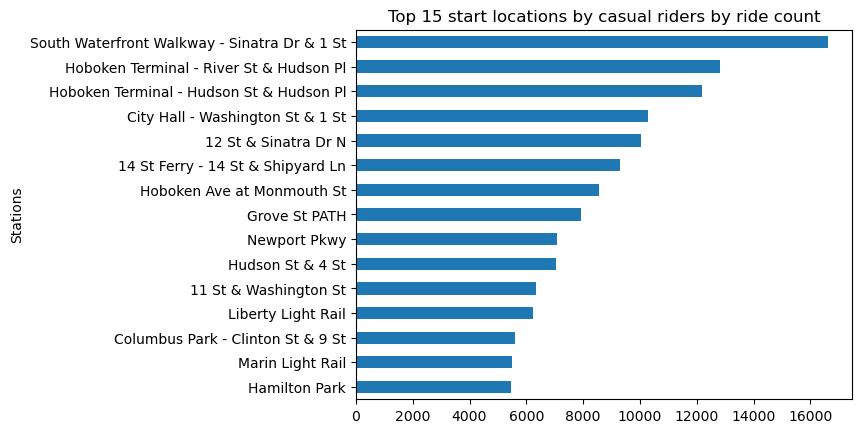

In [18]:
start_station_count_casual.sort_values().tail(15).plot(kind='barh', title='Top 15 start locations by casual riders by ride count', xlabel='Stations', ylabel='Ride count')
plt.show()

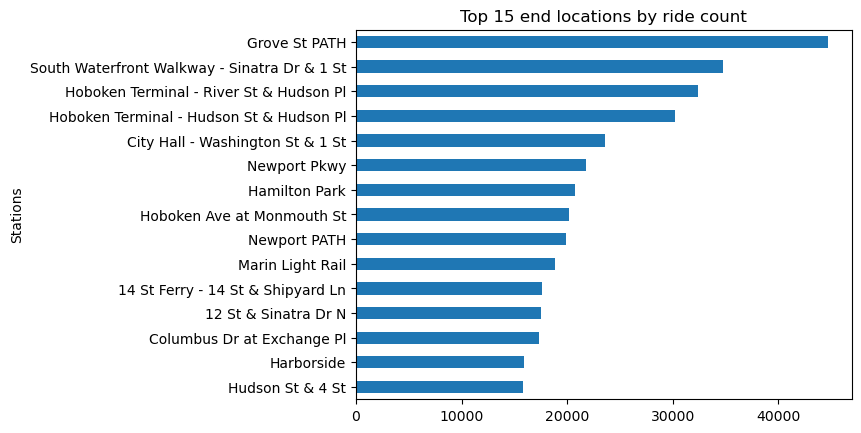

In [19]:
end_station_count.sort_values().tail(15).plot(kind='barh', title='Top 15 end locations by ride count', xlabel='Stations', ylabel='Ride count')
plt.show()

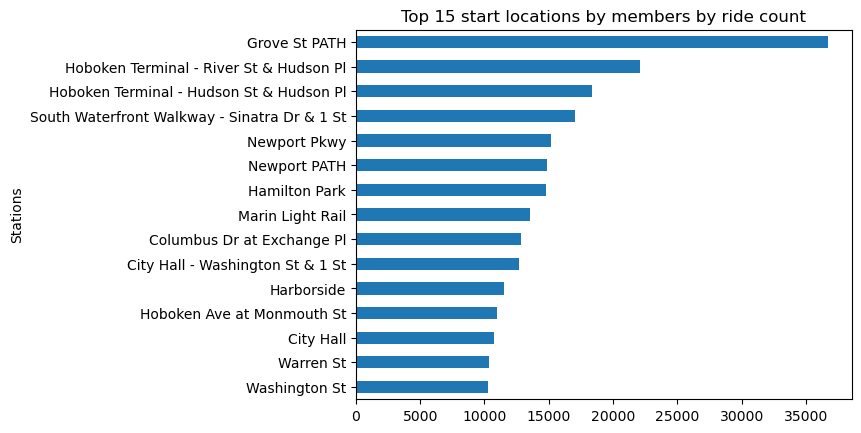

In [20]:
end_station_count_members.sort_values().tail(15).plot(kind='barh', title='Top 15 start locations by members by ride count', xlabel='Stations', ylabel='Ride count')
plt.show()

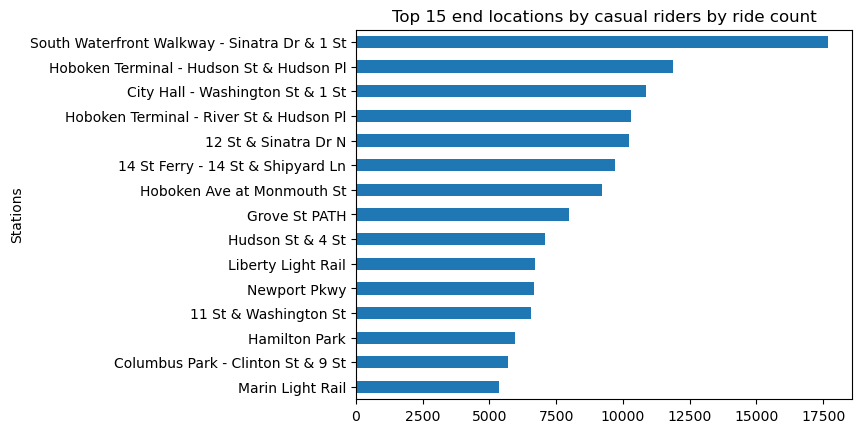

In [21]:
end_station_count_casual.sort_values().tail(15).plot(kind='barh', title='Top 15 end locations by casual riders by ride count', xlabel='Stations', ylabel='Ride count')
plt.show()

# UserType

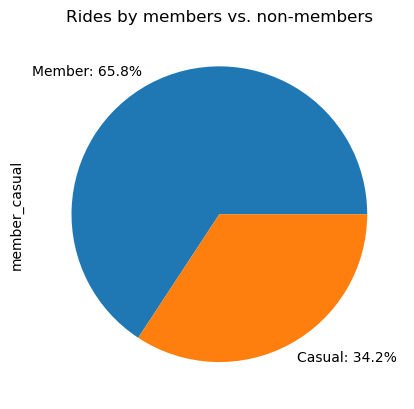

member    0.657532
casual    0.342468
Name: member_casual, dtype: float64

In [22]:
dataframe_2022.member_casual.value_counts(normalize=True).plot(kind='pie', title='Rides by members vs. non-members', labels=['Member: 65.8%', 'Casual: 34.2%'])
plt.show()
dataframe_2022.member_casual.value_counts(normalize=True)

In [23]:
usertype_day = dataframe_2022.groupby(["day_name", "member_casual"]).count()["ride_id"]
print(usertype_day)
usertype_hour = dataframe_2022.groupby(["hour", "member_casual"]).count()["ride_id"]
print(usertype_hour)

day_name   member_casual
Friday     casual           45974
           member           87148
Monday     casual           34444
           member           81245
Saturday   casual           61960
           member           74868
Sunday     casual           53229
           member           65545
Thursday   casual           39316
           member           92604
Tuesday    casual           33772
           member           91677
Wednesday  casual           37980
           member           95723
Name: ride_id, dtype: int64
hour  member_casual
0     casual            6094
      member            5780
1     casual            4326
      member            3337
2     casual            2680
      member            1845
3     casual            1412
      member            1139
4     casual            1259
      member            1362
5     casual            2202
      member            5370
6     casual            4409
      member           16286
7     casual            7225
      member    

# Insights

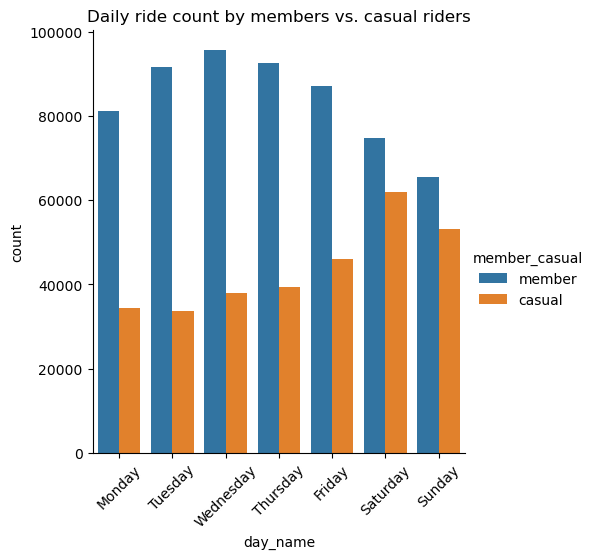

In [24]:
sns.catplot(data= dataframe_2022, x = 'day_name', kind= 'count', hue = 'member_casual', order = category_order).set(title='Daily ride count by members vs. casual riders')
plt.xticks(rotation=45)
plt.show()

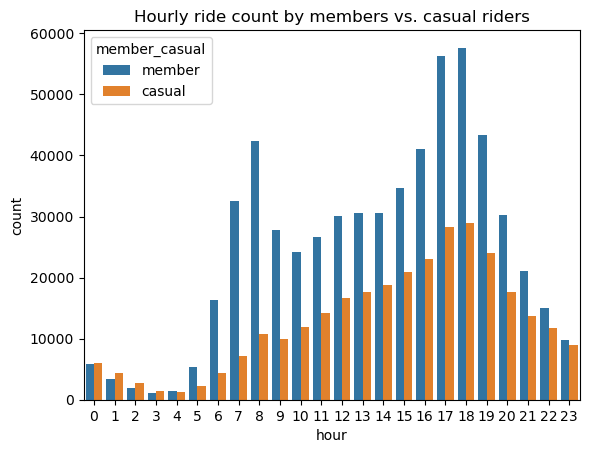

In [25]:
sns.countplot(data= dataframe_2022, x = 'hour', hue = 'member_casual').set(title='Hourly ride count by members vs. casual riders')

plt.show()

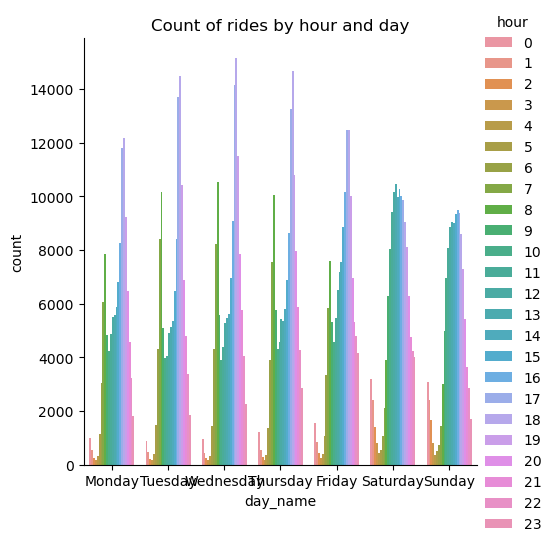

In [26]:
sns.catplot(data= dataframe_2022, x = 'day_name', kind= 'count', hue ='hour', order = category_order).set(title = 'Count of rides by hour and day')
plt.show()

In [66]:
dataframe_2022_members = dataframe_2022[dataframe_2022['member_casual']== 'member']
dataframe_2022_casual = dataframe_2022[dataframe_2022['member_casual']=='casual']

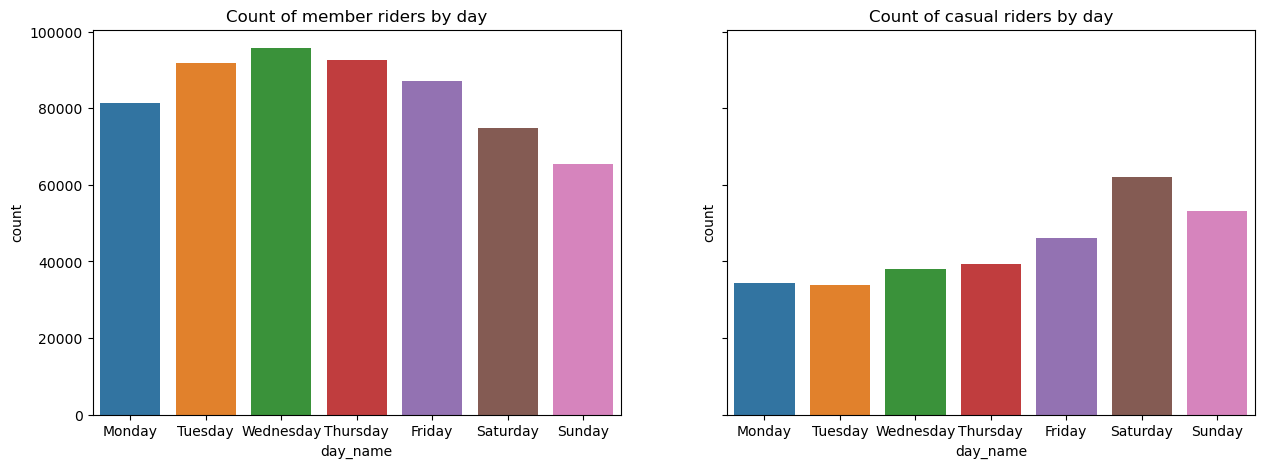

In [84]:
fig, ax = plt.subplots(1,2, sharey=True, figsize=(15,5))
sns.countplot(ax= ax[0], x='day_name', data= dataframe_2022_members, order= category_order)
ax[0].set_title('Count of member riders by day')
sns.countplot(ax= ax[1], x='day_name', data= dataframe_2022_casual, order=category_order)
ax[1].set_title('Count of casual riders by day')
plt.show()

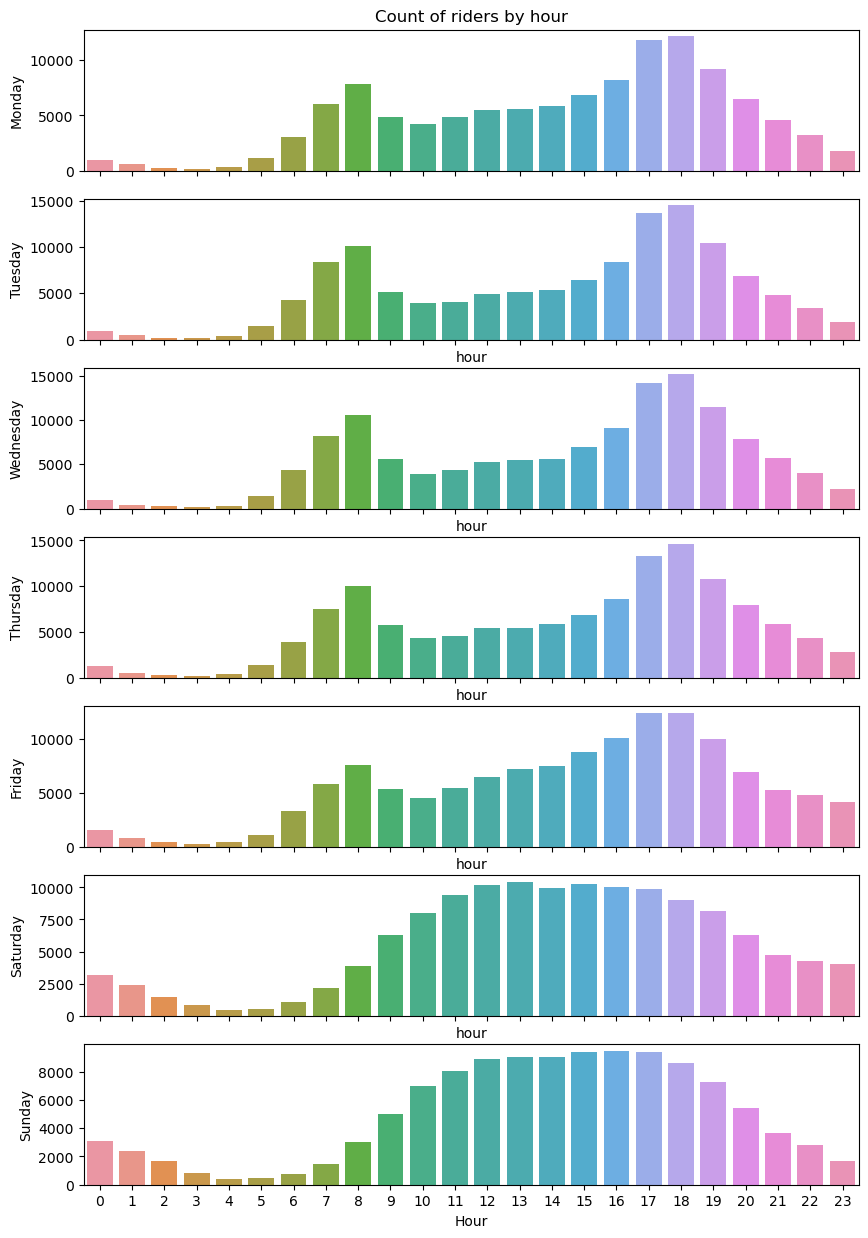

In [65]:
category_order_hours=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
monday= dataframe_2022[dataframe_2022['day_name']=='Monday']
tuesday= dataframe_2022[dataframe_2022['day_name']=='Tuesday']
wednesday= dataframe_2022[dataframe_2022['day_name']=='Wednesday']
thursday= dataframe_2022[dataframe_2022['day_name']=='Thursday']
friday= dataframe_2022[dataframe_2022['day_name']=='Friday']
saturday= dataframe_2022[dataframe_2022['day_name']=='Saturday']
sunday= dataframe_2022[dataframe_2022['day_name']=='Sunday']

fig, ax = plt.subplots(7,1, figsize= (10,15), sharex=True)
sns.countplot(ax= ax[0], x='hour', data= monday, order= category_order_hours)
ax[0].set_title('Count of riders by hour')
ax[0].set_ylabel('Monday')
ax[0].set_xlabel('')
sns.countplot(ax= ax[1], x='hour', data= tuesday, order=category_order_hours)
ax[1].set_ylabel('Tuesday')
sns.countplot(ax= ax[2], x='hour', data= wednesday, order=category_order_hours)
ax[2].set_ylabel('Wednesday')
sns.countplot(ax= ax[3], x='hour', data= thursday, order=category_order_hours)
ax[3].set_ylabel('Thursday')
sns.countplot(ax= ax[4], x='hour', data= friday, order=category_order_hours)
ax[4].set_ylabel('Friday')
sns.countplot(ax= ax[5], x='hour', data= saturday, order=category_order_hours)
ax[5].set_ylabel('Saturday')
sns.countplot(ax= ax[6], x='hour', data= sunday, order=category_order_hours)
ax[6].set_ylabel('Sunday')
ax[6].set_xlabel('Hour')
plt.show()


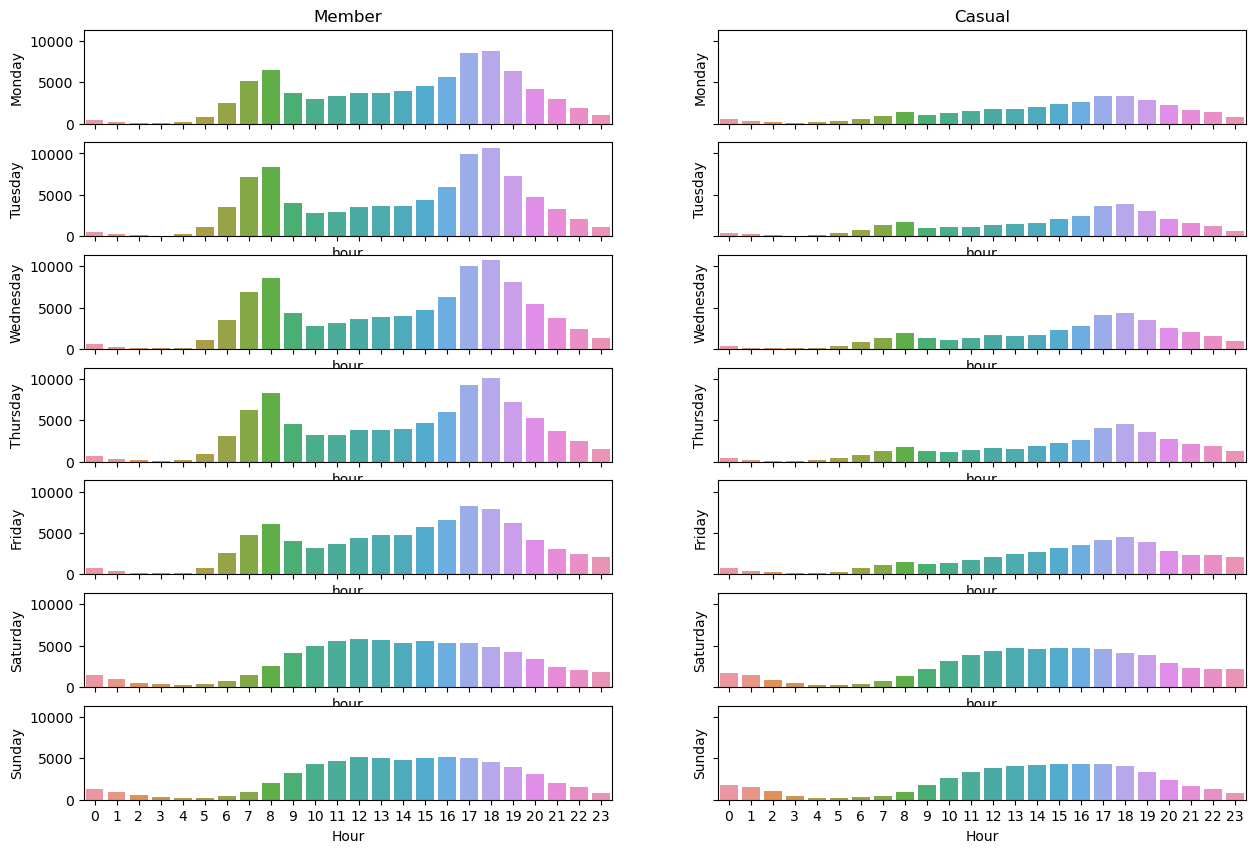

In [81]:
category_order_hours=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
monday_member= dataframe_2022[(dataframe_2022['day_name']=='Monday') & (dataframe_2022['member_casual']=='member')]
monday_casual= dataframe_2022[(dataframe_2022['day_name']=='Monday') & (dataframe_2022['member_casual']=='casual')]
tuesday_member= dataframe_2022[(dataframe_2022['day_name']=='Tuesday') & (dataframe_2022['member_casual']=='member')]
tuesday_casual= dataframe_2022[(dataframe_2022['day_name']=='Tuesday') & (dataframe_2022['member_casual']=='casual')]
wednesday_member= dataframe_2022[(dataframe_2022['day_name']=='Wednesday') & (dataframe_2022['member_casual']=='member')]
wednesday_casual= dataframe_2022[(dataframe_2022['day_name']=='Wednesday') & (dataframe_2022['member_casual']=='casual')]
thursday_member= dataframe_2022[(dataframe_2022['day_name']=='Thursday') & (dataframe_2022['member_casual']=='member')]
thursday_casual= dataframe_2022[(dataframe_2022['day_name']=='Thursday') & (dataframe_2022['member_casual']=='casual')]
friday_member= dataframe_2022[(dataframe_2022['day_name']=='Friday') & (dataframe_2022['member_casual']=='member')]
friday_casual= dataframe_2022[(dataframe_2022['day_name']=='Friday') & (dataframe_2022['member_casual']=='casual')]
saturday_member= dataframe_2022[(dataframe_2022['day_name']=='Saturday') & (dataframe_2022['member_casual']=='member')]
saturday_casual= dataframe_2022[(dataframe_2022['day_name']=='Saturday') & (dataframe_2022['member_casual']=='casual')]
sunday_member= dataframe_2022[(dataframe_2022['day_name']=='Sunday') & (dataframe_2022['member_casual']=='member')]
sunday_casual= dataframe_2022[(dataframe_2022['day_name']=='Sunday') & (dataframe_2022['member_casual']=='casual')]


tuesday= dataframe_2022[dataframe_2022['day_name']=='Tuesday']
wednesday= dataframe_2022[dataframe_2022['day_name']=='Wednesday']
thursday= dataframe_2022[dataframe_2022['day_name']=='Thursday']
friday= dataframe_2022[dataframe_2022['day_name']=='Friday']
saturday= dataframe_2022[dataframe_2022['day_name']=='Saturday']
sunday= dataframe_2022[dataframe_2022['day_name']=='Sunday']

fig, ax = plt.subplots(7,2, figsize= (15,10), sharex=True, sharey=True)
sns.countplot(ax= ax[0,0], x='hour', data= monday_member, order= category_order_hours)
ax[0,0].set_title('Member')
ax[0,0].set_ylabel('Monday')
ax[0,0].set_xlabel('')
sns.countplot(ax= ax[0,1], x='hour', data= monday_casual, order= category_order_hours)
ax[0,1].set_title('Casual')
ax[0,1].set_ylabel('Monday')
ax[0,1].set_xlabel('')
sns.countplot(ax= ax[1,0], x='hour', data= tuesday_member, order=category_order_hours)
ax[1,0].set_ylabel('Tuesday')
sns.countplot(ax= ax[1,1], x='hour', data= tuesday_casual, order=category_order_hours)
ax[1,1].set_ylabel('Tuesday')
sns.countplot(ax= ax[2,0], x='hour', data= wednesday_member, order=category_order_hours)
ax[2,0].set_ylabel('Wednesday')
sns.countplot(ax= ax[2,1], x='hour', data= wednesday_casual, order=category_order_hours)
ax[2,1].set_ylabel('Wednesday')
sns.countplot(ax= ax[3,0], x='hour', data= thursday_member, order=category_order_hours)
ax[3,0].set_ylabel('Thursday')
sns.countplot(ax= ax[3,1], x='hour', data= thursday_casual, order=category_order_hours)
ax[3,1].set_ylabel('Thursday')
sns.countplot(ax= ax[4,0], x='hour', data= friday_member, order=category_order_hours)
ax[4,0].set_ylabel('Friday')
sns.countplot(ax= ax[4,1], x='hour', data= friday_casual, order=category_order_hours)
ax[4,1].set_ylabel('Friday')
sns.countplot(ax= ax[5,0], x='hour', data= saturday_member, order=category_order_hours)
ax[5,0].set_ylabel('Saturday')
sns.countplot(ax= ax[5,1], x='hour', data= saturday_casual, order=category_order_hours)
ax[5,1].set_ylabel('Saturday')
sns.countplot(ax= ax[6,0], x='hour', data= sunday_member, order=category_order_hours)
ax[6,0].set_ylabel('Sunday')
ax[6,0].set_xlabel('Hour')
sns.countplot(ax= ax[6,1], x='hour', data= sunday_casual, order=category_order_hours)
ax[6,1].set_ylabel('Sunday')
ax[6,1].set_xlabel('Hour')
plt.show()

<AxesSubplot:>

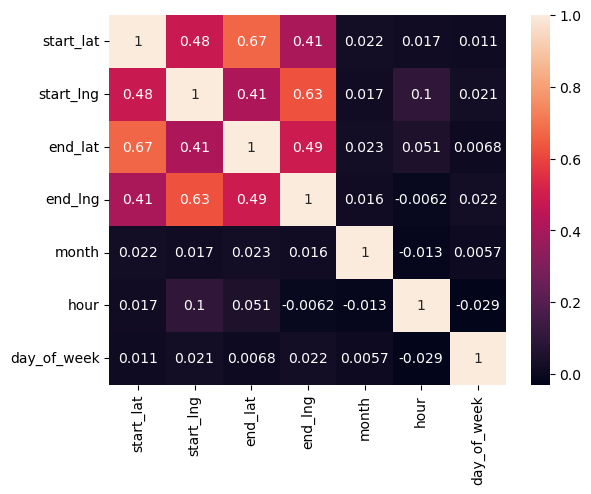

In [30]:
correlated_dataframe = dataframe_2022.corr()
sns.heatmap(correlated_dataframe, annot=True)